In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os

# Q2-1

1. Central difference method:
The central difference method calculates the gradient by taking the difference between pixel intensities at the points on either side of the pixel. The mathematical expression for the central difference method is as follows:
$$G_x = I_{x+1, y} - I_{x-1, y}$$
$$G_y = I_{x, y+1} - I_{x, y-1}$$
$$G = \sqrt{G_x^2 + G_y^2}$$

where $I$ represents the intensity of the pixel at the specified coordinate, and $G_x$, $G_y$, and $G$ represent the gradient in the x-direction, y-direction, and magnitude, respectively.

2. Forward difference method:
The forward difference method calculates the gradient by taking the difference between the pixel intensity at the current pixel and the intensity at the neighboring pixel in the positive x-direction (i.e., to the right). The mathematical expression for the forward difference method is as follows:
$$G_x = I_{x+1, y} - I_{x, y}$$
$$G_y = I_{x, y+1} - I_{x, y}$$
$$G = \sqrt{G_x^2 + G_y^2}$$

3. Backward difference method:
The backward difference method calculates the gradient by taking the difference between the pixel intensity at the current pixel and the intensity at the neighboring pixel in the negative x-direction (i.e., to the left). The mathematical expression for the backward difference method is as follows:
$$G_x = I_{x, y} - I_{x-1, y}$$
$$G_y = I_{x, y} - I_{x, y-1}$$
$$G = \sqrt{G_x^2 + G_y^2}$$

In all three methods, the magnitude of the gradient is calculated by combining the gradients in the x- and y-directions using the Pythagorean theorem.

In [2]:
# Implementation of central difference, forward difference & backward difference

def central_difference(arr):
    out = np.zeros_like(arr, dtype=int)
    out[0] = 0
    out[-1] = 0
    for i in range(1, len(arr)-1):
        out[i] = abs(int(arr[i+1]) - int(arr[i-1]))
    return out


def forward_difference(arr):
    out = np.zeros_like(arr, dtype=int)
    out[-1] = 0
    for i in range(len(arr)-1):
        out[i] = abs(int(arr[i+1]) - int(arr[i]))
    return out


def backward_difference(arr):
    out = np.zeros_like(arr, dtype=int)
    out[0] = arr[0]
    for i in range(1, len(arr)):
        out[i] = abs(int(arr[i]) - int(arr[i-1]))
    return out


def central_difference_2d(in_img, axis=0):
    out_img = []
    if axis == 0:
        for i in range(in_img.shape[0]):
            row = in_img[i]
            new_row = central_difference(row)
            out_img.append(new_row)
        out_img = np.array(out_img, dtype='uint8')
    else:
        for i in range(in_img.shape[1]):
            col = in_img[:, i]
            new_col = central_difference(col)
            out_img.append(new_col)
        out_img = np.array(out_img, dtype='uint8').T
    return out_img


def forward_difference_2d(in_img, axis=0):
    out_img = []
    if axis == 0:
        for i in range(in_img.shape[0]):
            row = in_img[i]
            new_row = forward_difference(row)
            out_img.append(new_row)
        out_img = np.array(out_img, dtype='uint8')
    else:
        for i in range(in_img.shape[1]):
            col = in_img[:, i]
            new_col = forward_difference(col)
            out_img.append(new_col)
        out_img = np.array(out_img, dtype='uint8').T
    return out_img


def backward_difference_2d(in_img, axis=0):
    out_img = []
    if axis == 0:
        for i in range(in_img.shape[0]):
            row = in_img[i]
            new_row = backward_difference(row)
            out_img.append(new_row)
        out_img = np.array(out_img, dtype='uint8')
    else:
        for i in range(in_img.shape[1]):
            col = in_img[:, i]
            new_col = backward_difference(col)
            out_img.append(new_col)
        out_img = np.array(out_img, dtype='uint8').T
    return out_img


def calc_img_gradient(in_img, method='central'):
    if method == 'central':
        mf = central_difference_2d
    elif method == 'forward':
        mf = forward_difference_2d
    elif method == 'backward':
        mf = backward_difference_2d
    else:
        raise ValueError("method must be central, forward or backward")

    gx = mf(in_img, axis=0)
    gy = mf(in_img, axis=1)
    g = np.sqrt(gx.astype(float) ** 2 + gy.astype(float) ** 2)
    g = np.floor(255 * (g - np.min(g)) / (np.max(g) - np.min(g)))
    return g.astype('uint8'), gx, gy

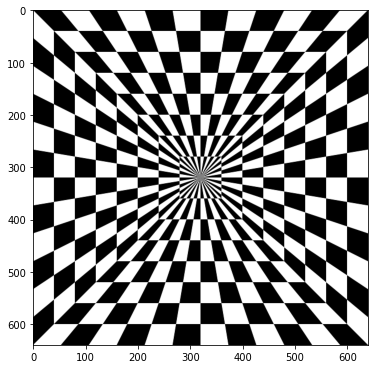

In [ ]:
img = cv2.imread('q1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6, 8))
plt.imshow(gray, cmap='gray')
plt.show()

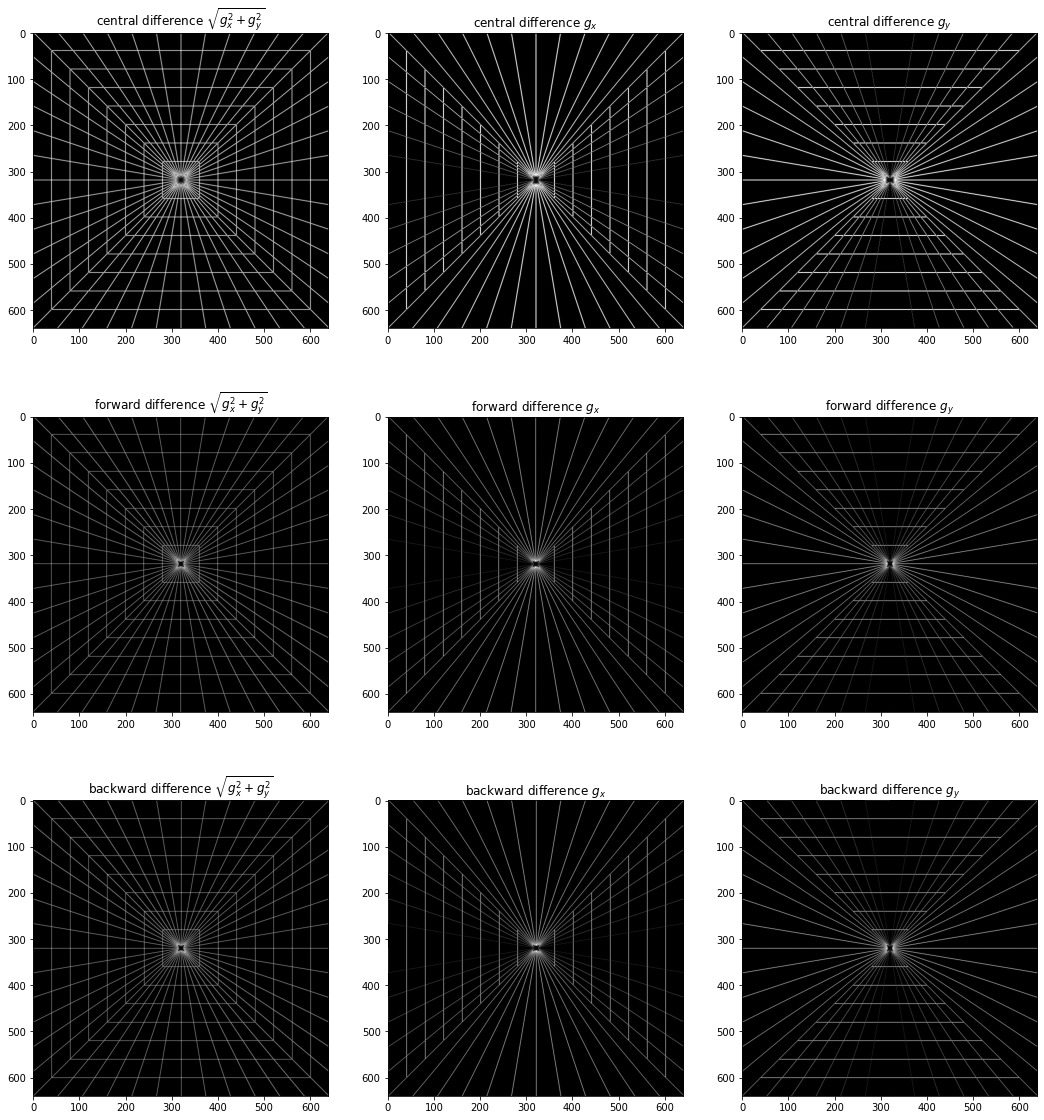

In [ ]:
methods = ['central', 'forward', 'backward']

fig = plt.figure(figsize=(18, 20))
n, m = len(methods), 3
for i, method in enumerate(methods):
    g, gx, gy = calc_img_gradient(gray, method)

    fig.add_subplot(n, m, 3*i+1)
    plt.imshow(g, cmap='gray')
    plt.title(f'{method}' + ' difference $\sqrt{g_x^2 + g_y^2}$')
    fig.add_subplot(n, m, 3*i+2)
    plt.imshow(gx, cmap='gray')
    plt.title(f'{method} difference $g_x$')
    fig.add_subplot(n, m, 3*i+3)
    plt.imshow(gy, cmap='gray')
    plt.title(f'{method} difference $g_y$')

plt.show()

# Q2-2

In [20]:
def divide_to_four_parts(img):
    heigth, width = img.shape
    mid_w, mid_h = width // 2 + 1, heigth // 2 - 1
    img_lu = img[:mid_h, :mid_w]
    img_ld = img[mid_h:, :mid_w]
    img_ru = img[:mid_h, mid_w:]
    img_rd = img[mid_h:, mid_w:]
    return img_ru, img_lu, img_ld, img_rd


def calc_snr(origin_img, noisy_img):
    num = np.sum(origin_img.astype(int) ** 2)
    den = np.sum((origin_img.astype(int) - noisy_img.astype(int)) ** 2)
    snr = 10 * np.log10(num / den)
    return snr


def conv2d(image, kernel, padding='same'):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    if padding == 'valid':
        output_height = image_height - kernel_height + 1
        output_width = image_width - kernel_width + 1
        padding_height = padding_width = 0
    elif padding == 'same':
        output_height = image_height
        output_width = image_width
        padding_height = ((kernel_height - 1) // 2)
        padding_width = ((kernel_width - 1) // 2)
    elif padding == 'full':
        output_height = image_height + kernel_height - 1
        output_width = image_width + kernel_width - 1
        padding_height = kernel_height - 1
        padding_width = kernel_width - 1
    else:
        raise ValueError("Padding mode must be 'valid', 'same', or 'full'.")

    padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            output[i][j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)

    return output


def median_filter(img, kernel_size=3):
    rows, cols = img.shape
    filtered_image = np.zeros((rows, cols), dtype=np.uint8)
    k = kernel_size // 2
    for i in range(k, rows-k):
        for j in range(k, cols-k):
            neighborhood = img[i-k:i+k+1, j-k:j+k+1]
            median_value = np.median(neighborhood)
            filtered_image[i,j] = median_value
    return filtered_image


def gaussian_filter(img, kernel_size=3, sigma=1):
    k = kernel_size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]
    kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    out = conv2d(img.astype(int), kernel)
    out = np.floor(255 * (out - np.min(out)) / (np.max(out) - np.min(out)))
    return out.astype('uint8')


def mean_filter(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size)) / kernel_size
    return conv2d(img, kernel)

In [4]:
# create dataframe to save SNR values
columns=["SNR of Noisy Image", "SNR after Median Filter", "SNR after Gaussian Filter", "SNR after Mean Filter"]
index = ["Image with Salt & Pepper Noise (left-up)", "Image with Gaussian and Salt & Pepper Noise (left-down)", "Image with Gaussian Noise (right-down)"]
df = pd.DataFrame(columns=columns, index=index)

In [136]:
# load and convert to gray image
origin_img = cv2.imread('city_orig.jpg')
origin_img_gray = cv2.cvtColor(origin_img, cv2.COLOR_BGR2GRAY)

noisy_img = cv2.imread('city_noise.jpg')
noisy_img_gray = cv2.cvtColor(noisy_img, cv2.COLOR_BGR2GRAY)

# devide images according to type of noise
origin_img_ru, origin_img_lu, origin_img_ld, origin_img_rd = divide_to_four_parts(origin_img_gray)
noisy_img_ru, noisy_img_lu, noisy_img_ld, noisy_img_rd = divide_to_four_parts(noisy_img_gray)

# prepare lists to save data
origin_images = [origin_img_lu, origin_img_ld, origin_img_rd]
noisy_images = [noisy_img_lu, noisy_img_ld, noisy_img_rd]
snr_noisy_images = []
filtered_images = []
snr_filtered_images = []

configs = [(3, 7, 2, 3), (3, 7, 2, 3), (5, 7, 2, 3)]
# do same operations(calculate SNR for noisy image, apply filters, calulate SNR for filtered images) for each noise
for i in range(len(origin_images)):
    # calculate SNR of noisy image
    snr_noisy = calc_snr(origin_images[i], noisy_images[i])
    snr_noisy_images.append(snr_noisy)

    # apply median filter, gaussian filter and mean filter
    median_filtered = median_filter(noisy_images[i], configs[i][0])
    gaussian_filtered = gaussian_filter(noisy_images[i], configs[i][1], configs[i][2])
    mean_filtered = mean_filter(noisy_images[i], configs[i][3])
    filtered_images.append([median_filtered, gaussian_filtered, mean_filtered])

    # calculate SNR of filtered images
    snr_median_filtered = calc_snr(origin_images[i], median_filtered)
    snr_gaussian_filtered = calc_snr(origin_images[i], gaussian_filtered)
    snr_mean_filtered = calc_snr(origin_images[i], mean_filtered)
    snr_filtered_images.append([snr_median_filtered, snr_gaussian_filtered, snr_mean_filtered])

# save SNR values in dataframe
df[columns[0]] = snr_noisy_images
df[columns[1]] = snr_filtered_images[:][0]
df[columns[2]] = snr_filtered_images[:][1]
df[columns[3]] = snr_filtered_images[:][2]

In [137]:
df

,SNR of Noisy Image,SNR after Median Filter,SNR after Gaussian Filter,SNR after Mean Filter
Image with Salt & Pepper Noise (left-up),12.017101,17.896440,8.799652,10.904693
Image with Gaussian and Salt & Pepper Noise (left-down),3.285813,18.463179,12.360652,11.811403
Image with Gaussian Noise (right-down),4.138272,-5.591277,-6.601656,-6.507028


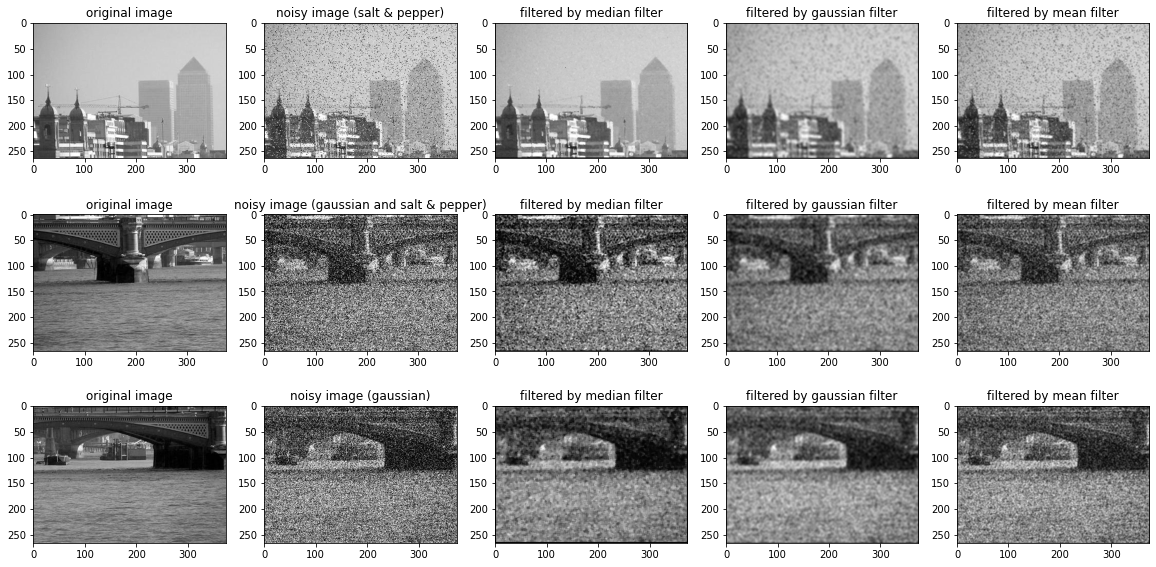

In [138]:
plt.figure(figsize=(20, 10))

noises = ["salt & pepper", "gaussian and salt & pepper", "gaussian"]
n = len(origin_images)
for i in range(n):
    plt.subplot(n, 5, 1+5*i)
    plt.imshow(origin_images[i], cmap='gray')
    plt.title('original image')
    plt.subplot(n, 5, 2+5*i)
    plt.imshow(noisy_images[i], cmap='gray')
    plt.title(f'noisy image ({noises[i]})')
    plt.subplot(n, 5, 3+5*i)
    plt.imshow(filtered_images[i][0], cmap='gray')
    plt.title('filtered by median filter')
    plt.subplot(n, 5, 4+5*i)
    plt.imshow(filtered_images[i][1], cmap='gray')
    plt.title('filtered by gaussian filter')
    plt.subplot(n, 5, 5+5*i)
    plt.imshow(filtered_images[i][2], cmap='gray')
    plt.title('filtered by mean filter')
plt.show()

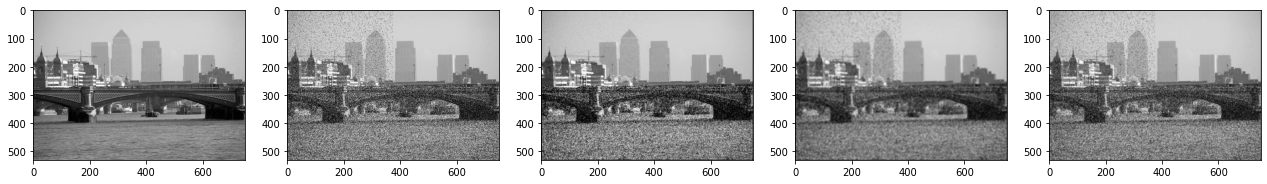

In [140]:
median_filtered = median_filter(noisy_img_gray)
gaussian_filtered = gaussian_filter(noisy_img_gray, 7, 2)
mean_filtered = mean_filter(noisy_img_gray)

plt.figure(figsize=(22, 8))


plt.subplot(1, 5, 1)
plt.imshow(origin_img_gray, cmap='gray')
plt.subplot(1, 5, 2)
plt.imshow(noisy_img_gray, cmap='gray')
plt.subplot(1, 5, 3)
plt.imshow(median_filtered, cmap='gray')
plt.subplot(1, 5, 4)
plt.imshow(gaussian_filtered, cmap='gray')
plt.subplot(1, 5, 5)
plt.imshow(mean_filtered, cmap='gray')
plt.show()

As we can see in both images output and SNR values,

for salt & pepper noise, the meadian filter is the best and it can completely remove the noise.

for gaussian noise, the median filter is better than others. In some cases the gaussian filter works well too.

for the combination of both noises, the median filter works better.

# Q2-3

## part 1: histogram normalization

In [141]:
def histogram_normalizer(img, dist='uniform'):
    if len(img.shape) < 3:
        img_gray = img
    else:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    if dist == 'uniform':
        hist, bins = np.histogram(img_gray.flatten(), 256, [0,256])
    else:
        raise ValueError("dist must be uniform")
    
    cdf = np.cumsum(hist)
    norm_cdf = cdf * 255 / (img_gray.shape[0] * img_gray.shape[1])

    mapping_fun = np.interp(np.arange(0, 256), bins[:-1], norm_cdf)

    new_img_flatten = np.round(mapping_fun[img_gray.flatten()])
    new_img = np.reshape(new_img_flatten, img_gray.shape).astype('uint8')

    return new_img


def plot_img_hist(img, bins=50):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.hist(img.flatten(), bins=bins, rwidth=0.8, density=0)
    plt.xlabel('pixel value')
    plt.ylabel('Count')
    plt.title('Histogram')

    plt.show()

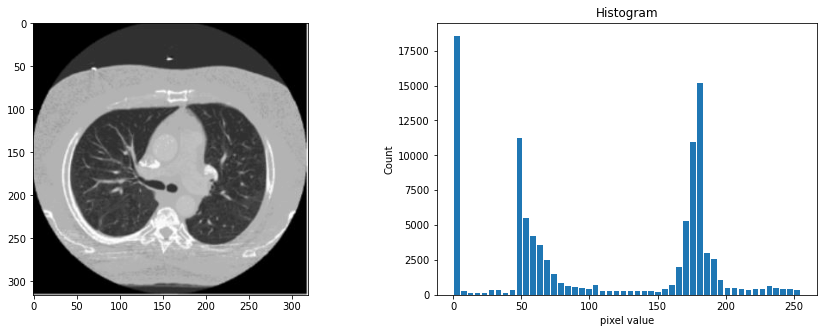

In [ ]:
img = cv2.imread('q3_1.JPG')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plot_img_hist(img_gray)

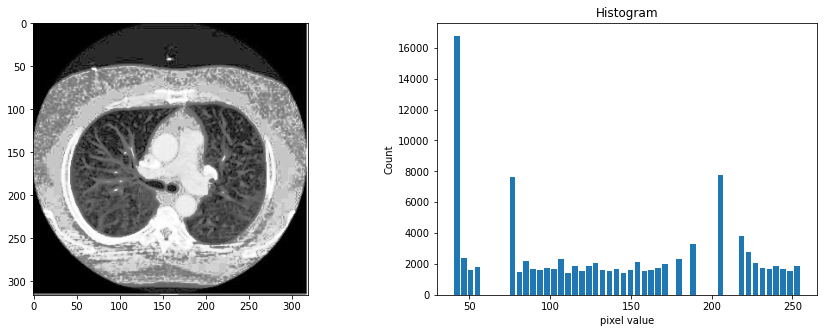

In [ ]:
new_img = histogram_normalizer(img_gray)

plot_img_hist(new_img)

Histogram Equalization is a computer image processing technique used to improve contrast in images. It accomplishes this by effectively spreading out the most frequent intensity values, i.e. stretching out the intensity range of the image. This method usually increases the global contrast of images when its usable data is represented by close contrast values. This allows for areas of lower local contrast to gain a higher contrast.

save new image & its histogram

In [ ]:
plt.hist(img_gray.flatten(), bins=50, rwidth=0.8, density=0)
plt.savefig('q3res1.jpg')
plt.show()

In [ ]:
plt.imshow(new_img, cmap='gray')
plt.savefig('q3res2.jpg')
plt.show()

In [ ]:
plt.hist(new_img.flatten(), bins=50, rwidth=0.8, density=0)
plt.savefig('q3res3.jpg')
plt.show()

## part 2 (Optional): histogram specification

In [ ]:
def histogram_specifier(source_image, target_image):
    
    source_hist, source_bins = np.histogram(source_image.flatten(), 256, [0,256])
    target_hist, target_bins = np.histogram(source_image.flatten(), 256, [0,256])

    source_cdf = np.cumsum(source_hist) / (source_image.shape[0] * source_image.shape[1])
    target_cdf = np.cumsum(target_hist) / (target_image.shape[0] * target_image.shape[1])

    mapping_fun = np.zeros((256,), dtype=np.uint8)
    for i in range(256):
        mapping_fun[i] = np.argmin(np.abs(target_cdf - source_cdf[i]))
    
    new_image_flatten = np.round(mapping_fun[source_image.flatten()])
    new_image = np.reshape(new_image_flatten, source_image.shape).astype('uint8')

    return new_image

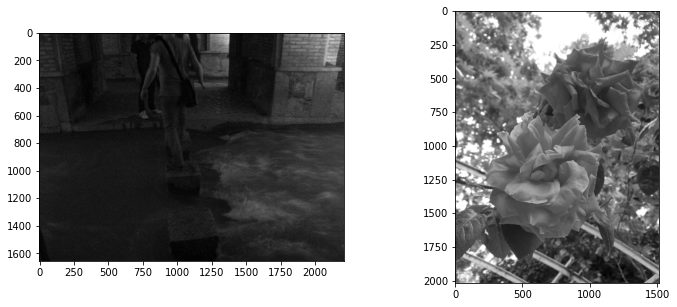

In [ ]:
source_image = cv2.imread('q3_2.jpg')
target_image = cv2.imread('q3_3.jpg')

source_image_gray = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
target_image_gray = cv2.cvtColor(target_image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(source_image_gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(target_image_gray, cmap='gray')
plt.show()

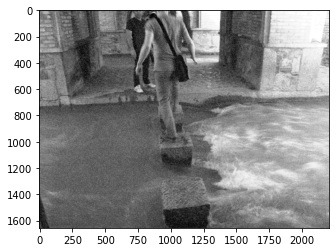

In [ ]:
new_image = histogram_specifier(source_image_gray, target_image_gray)

plt.imshow(new_image, cmap='gray')
plt.savefig('q3_1_histSpecification_output.jpg')
plt.show()

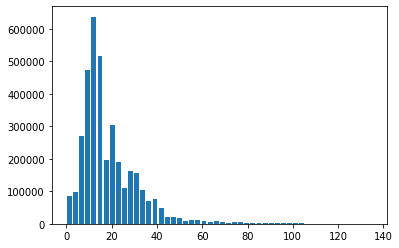

In [ ]:
plt.hist(source_image_gray.flatten(), bins=50, rwidth=0.8, density=0)
plt.savefig('q3_1_histogram.jpg')
plt.show()

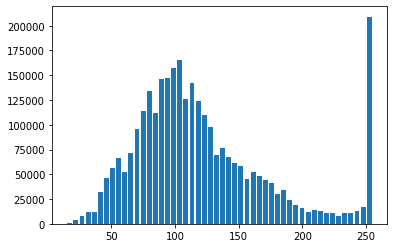

In [ ]:
plt.hist(target_image_gray.flatten(), bins=50, rwidth=0.8, density=0)
plt.savefig('q3_2_histogram.jpg')
plt.show()

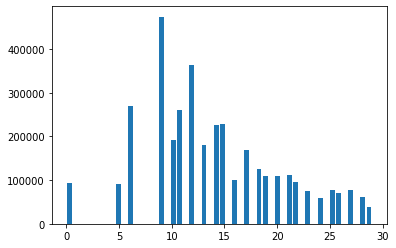

In [ ]:
plt.hist(new_image.flatten(), bins=50, rwidth=0.8, density=0)
plt.savefig('q3_1_histSpecification_output_histogram.jpg')
plt.show()

# Q2-4

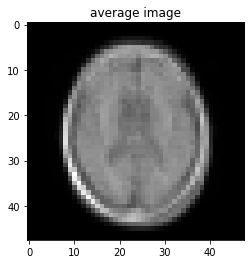

In [ ]:
def pca(X, m):
    mu = np.mean(X, axis=0)
    C = np.cov(X.T)

    U, _ ,_ = np.linalg.svd(C)
    A = U.T

    W = (X - mu).dot(U)
    X_tild = W[:, :m].dot(A[:m, :]) + mu

    err = np.mean(np.abs(X - X_tild) ** 2)

    return X_tild, err


def resize_image(image, scale_percent=50):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    return cv2.resize(image, dim, interpolation = cv2.INTER_AREA)


dir_path = 'brain_data'
images = []

for file_name in os.listdir(dir_path):
    file_path = os.path.join(dir_path, file_name)
    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(resize_image(image, 20), cv2.COLOR_BGR2GRAY)
    images.append(gray_image)

average_image = np.zeros_like(images[0], dtype=float)
for image in images:
    average_image += image.astype(float)
average_image = (np.floor(average_image / len(images))).astype('uint8')

plt.imshow(average_image, cmap='gray')
plt.title('average image')
plt.show()

In [ ]:
feature_matrix = []

for image in images:
    feature_matrix.append(image.flatten())
feature_matrix = np.array(feature_matrix)
print(feature_matrix.shape)

(15, 2304)


In [ ]:
cov_mat = np.cov(feature_matrix.T)

eigen_vectors, eigen_values ,_ = np.linalg.svd(cov_mat)

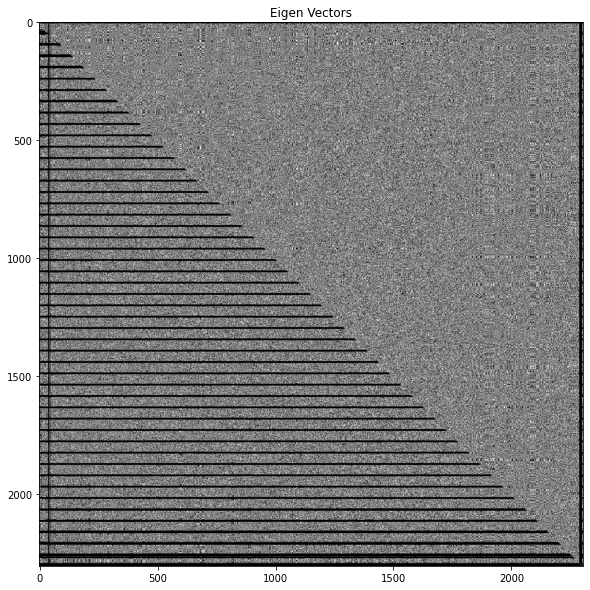

In [ ]:
plt.figure(figsize=(10, 10))

# plt.subplot(1, 2, 1)
# plt.plot(np.arange(1, len(eigen_values)+1), eigen_values)
# plt.title('Eigen Values')

# plt.subplot(1, 2, 2)
eigen_vectors_img = np.floor(eigen_vectors * 255).astype('uint8')
plt.imshow(eigen_vectors_img, cmap='gray')
plt.title('Eigen Vectors')

plt.show()

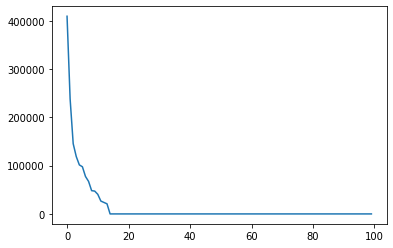

In [ ]:
plt.plot(eigen_values[:100])
plt.show()

In [ ]:
print(eigen_values[13], eigen_values[14])

20904.442066298197 3.633932298856029e-10


In [ ]:
for n in [12, 13, 14, 15, 16]:
    _, error = pca(feature_matrix, n)
    print(f'Error for num_components={n} is: {error}')

Error for num_components=12 is: 18.08598954193158
Error for num_components=13 is: 8.468234633338394
Error for num_components=14 is: 1.3122219551101297e-27
Error for num_components=15 is: 1.319595035445129e-27
Error for num_components=16 is: 1.3091695862535065e-27


In [ ]:
reconstructed_images, error = pca(feature_matrix, 14)

1.3122219551101297e-27

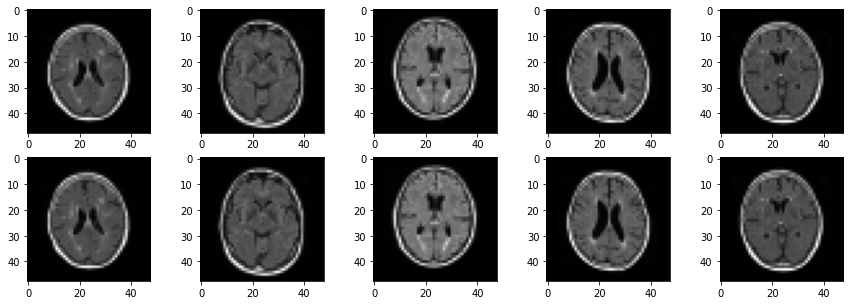

In [ ]:
plt.figure(figsize=(15, 5))
n_col = 5
for i in range(n_col):
    plt.subplot(2, n_col, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.subplot(2, n_col, n_col + i+1)
    plt.imshow(reconstructed_images[i].reshape(images[0].shape), cmap='gray')

The principal component analysis is a statistical method that allows you to summarise information into smaller sets that may be displayed and studied more readily. Large datasets are becoming more prevalent, yet they might be challenging to analyze. PCA is a technique for decreasing the dimensionality of datasets while enhancing interpretability and avoiding information loss. In the disciplines of statistics and data science, principal component analysis (PCA) is a crucial method to grasp.

**Advantages of Principal Component Analysis**

Correlated features are removed:

Running algorithms on large datasets with all of the features will lower the speed of your method and make it difficult to show the many characteristics in any type of graph. Finding connections in hundreds of characteristics manually is virtually difficult, tedious, and time-consuming because principal components are independent of one another, and associated characteristics are removed.

Enhances the performance of the algorithm:

With so many characteristics, your algorithm’s performance will surge greatly. The principal component analysis is a popular method for speeding up your machine Learning algorithm by removing associated variables that don’t help decision-making. With fewer features, the training time of the algorithms decreases considerably. So, if the input dimensions are too large, utilizing PCA to speed up the method is a viable option.

Enhanced Visualization:

PCA converts high-dimensional data to low-dimensional data that can be readily viewed. PCA produces large variance, which helps visualization. PCA is based on linear algebra, which is computationally simple for computers to solve. It accelerates other machine learning methods, allowing them to converge quicker when trained on main components rather than the original dataset.

**Disadvantages of Principal Component Analysis**

The major components are difficult to comprehend:

After applying principal component analysis to the dataset, your original features will be transformed into Principal Components. Original features are more legible and interpretable than Principal Components. Even the most basic invariance could not be caught by the PCA unless the training data clearly stated it. For example, after computing the main components, it is difficult to determine which characteristics in the dataset are the most significant.

Data normalization is required:

Before applying principal component analysis, you must normalize your data; otherwise, PCA will be difficult to discover optimal principal components. The scale has an effect on PCA, thus you must scale the features in your data before using PCA. As a result, principal components will be skewed toward characteristics with large variance, resulting in incorrect findings. 

Loss of information:

PCA accounts for the greatest amount of variation across data characteristics. If the number of Principal Components is not carefully chosen, it may miss certain information in contrast to the real list of characteristics. Although dimensionality reduction is beneficial, it has a cost. Loss of information is an inevitable component of principal component analysis. Managing the trade-off between dimensionality reduction and information loss is, regrettably, an unavoidable tradeoff when employing PCA.


# Q2-5

In [165]:
def opening(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype='uint8')
    eroded_img = cv2.erode(image, kernel)
    dilated_eroded_img = cv2.dilate(eroded_img, kernel)
    return dilated_eroded_img


def closing(image, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype='uint8')
    dilated_img = cv2.dilate(image, kernel)
    eroded_dilated_img = cv2.erode(dilated_img, kernel)
    return eroded_dilated_img

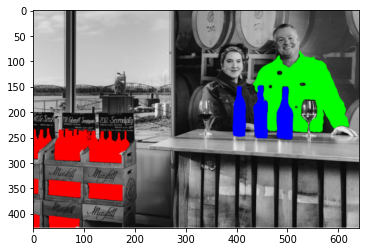

In [166]:
image = cv2.imread('q5.png')
plt.imshow(image)
plt.show()

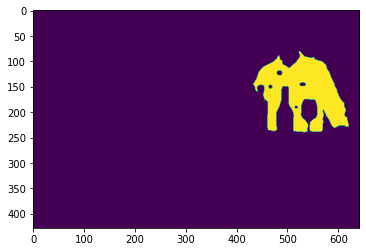

In [167]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(gray_image)
for i in range(gray_image.shape[0]):
    for j in range(gray_image.shape[1]):
        if image[i, j, 0] <= 50 and image[i, j, 1] >= 200 and image[i, j, 2] <= 50:
            mask[i, j] = 1

plt.imshow(mask)
plt.savefig('q5res01.jpg')
plt.show()

dfs for finding pixels for other things (pixels out of the shirt)

In [168]:
def dfs(mat, index=(0, 0)):
    n, m = len(mat), len(mat[0])
    visited = np.zeros((n, m))
    visited[index] = 1
    counter = 1
    topography_map = [index]
    neighbors = [index]
    while True:
        if len(neighbors) == 0:
            break
        neighbor = neighbors.pop()
        new_neighbors = get_neighbors(mat, neighbor)
        for new_neighbor in new_neighbors:
            if mat[neighbor] == mat[new_neighbor] and visited[new_neighbor] == 0:
                counter += 1
                neighbors.append(new_neighbor)
                visited[new_neighbor] = 1
                topography_map.append(new_neighbor)
    return counter, topography_map


def get_neighbors(mat, pixel):    
    pad_image = np.pad(mat, pad_width=((1, 1), (1, 1)), mode='edge')
    local_neighbors = [pixel, (pixel[0]+1, pixel[1]), (pixel[0]+2, pixel[1]),
                 (pixel[0], pixel[1]+1), (pixel[0], pixel[1]+2),
                 (pixel[0]+1, pixel[1]+2), (pixel[0]+2, pixel[1]+1), (pixel[0]+2, pixel[1]+2)]
    final_neighbors = []
    for neighbor in local_neighbors:
        if (0 < neighbor[0] < pad_image.shape[0]-1) and (0 < neighbor[1] < pad_image.shape[1]-1):
            final_neighbors.append((neighbor[0]-1, neighbor[1]-1))
    return final_neighbors


mask_bg = np.zeros_like(mask)
_, pixels = dfs(mask, index=(0, 0))
for pixel in pixels:
    mask_bg[pixel[0], pixel[1]] = 1

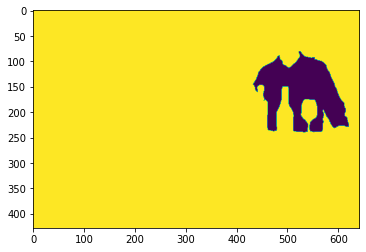

In [169]:
plt.imshow(mask_bg)
plt.show()

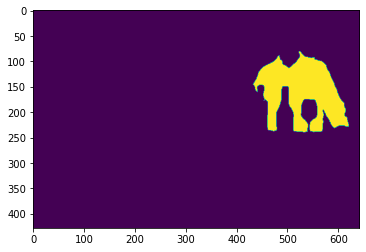

In [170]:
dilated_eroded_img = closing(mask, kernel_size=9)

dilated_eroded_img[mask_bg == 1] = 0
final_mask = dilated_eroded_img
plt.imshow(final_mask)
plt.savefig('q5res02.jpg')
plt.show()

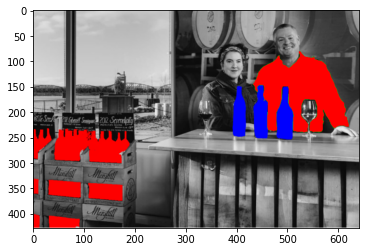

In [171]:
new_image = image.copy()
for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        if final_mask[i, j] == 1:
            new_image[i, j, 0] = 255
            new_image[i, j, 1] = 0
            new_image[i, j, 2] = 0

plt.imshow(new_image)
plt.savefig('q5res03.jpg')
plt.show()